# Data analysis, visualization, cleaning



In [2]:

# Define 11 data polyline visualization functions for each row
import pandas as pd
import matplotlib.pyplot as plt

def csv_data_plot_range(data_path,i,j):   
    data = pd.read_csv(data_path, header=None)
    # remove the 1st row from the data
    data = data.iloc[1:]
    #remove the 1st column from the data
    data = data.iloc[i:j, 1:]

    # print(data)
    # Plot the voltage trends for all batteries
    plt.figure(figsize=(12, 8))

    for index, row in data.iterrows():
        plt.plot(row, linestyle='-', alpha=0.3)  # Plot each battery's voltage trend with some transparency

    # Customize the plot
    plt.title(f'Voltage Trends for {j-i} Batteries Over 10 Hours')
    plt.xlabel('Time Interval (Hourly)')
    plt.ylabel('Voltage (V)')
    plt.grid(True)
    plt.tight_layout()

    # Show the plot
    plt.show()


In [5]:
# Define 11 data polyline visualization functions for each row
import pandas as pd
import matplotlib.pyplot as plt

def csv_data_plot(data_path):   
    data = pd.read_csv(data_path, header=None)
    # remove the 1st row from the data
    data = data.iloc[1:]
    #remove the 1st column from the data
    data = data.iloc[:, 1:]

    # print(data)
    # Plot the voltage trends for all batteries
    plt.figure(figsize=(12, 8))

    for index, row in data.iterrows():
        plt.plot(row, linestyle='-', alpha=0.3)  # Plot each battery's voltage trend with some transparency

    # Customize the plot
    plt.title('Voltage Trends for 500 Batteries Over 10 Hours')
    plt.xlabel('Time Interval (Hourly)')
    plt.ylabel('Voltage (V)')
    plt.grid(True)
    plt.tight_layout()

    # Show the plot
    plt.show()

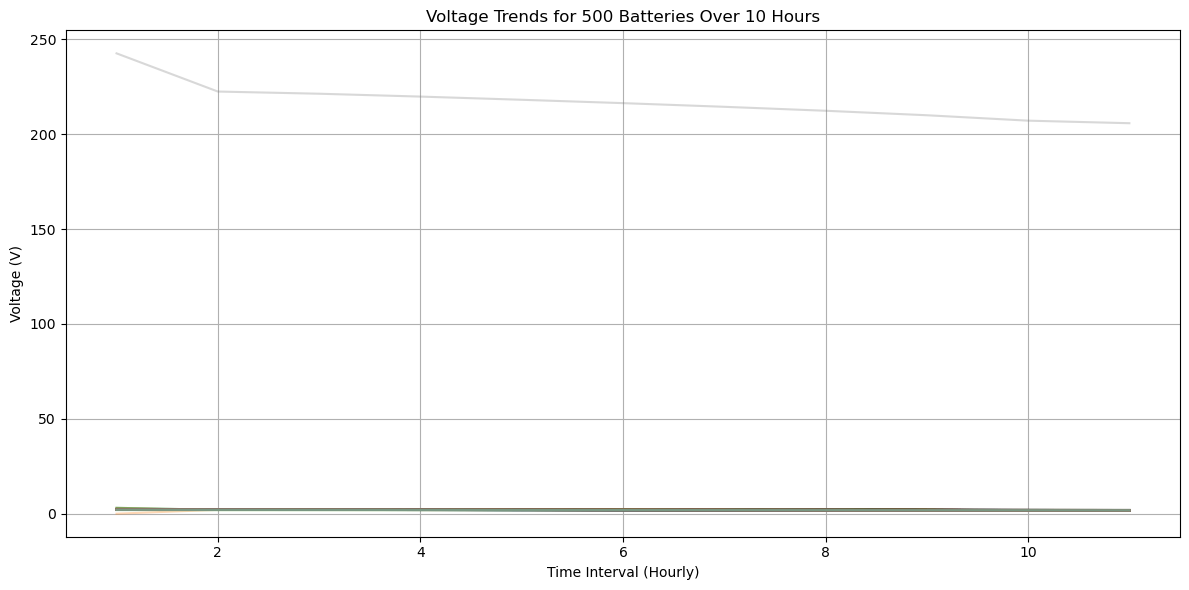

In [56]:
# 500 cases of data visualization

data_path = './transposed_battery_data_500.csv'
csv_data_plot(data_path)


As can be seen from the above analysis chart, there is an outlier with a voltage of more than 200;
Looking up the table, we can see that the 268th data is abnormal: eliminate the abnormal data; and perform visual display;

In [6]:

data_path = './transposed_battery_data_500_v2.csv'
data = pd.read_csv(data_path, header=None)

filter_data = data[data[1]>2.2]
print(filter_data)

filter_data = data[data[1]<1]
print(filter_data)
# 62 行

# remove the 1st row from the data
# data = data.iloc[1:]
# #remove the 1st column from the data
# data = data.iloc[:, 1:]

# print(data.iloc[267])

# # 删除元素
# data = data.drop(index=267)



Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Index: []
      0    1    2    3    4    5    6    7    8    9    10    11
0  index  0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  10.0


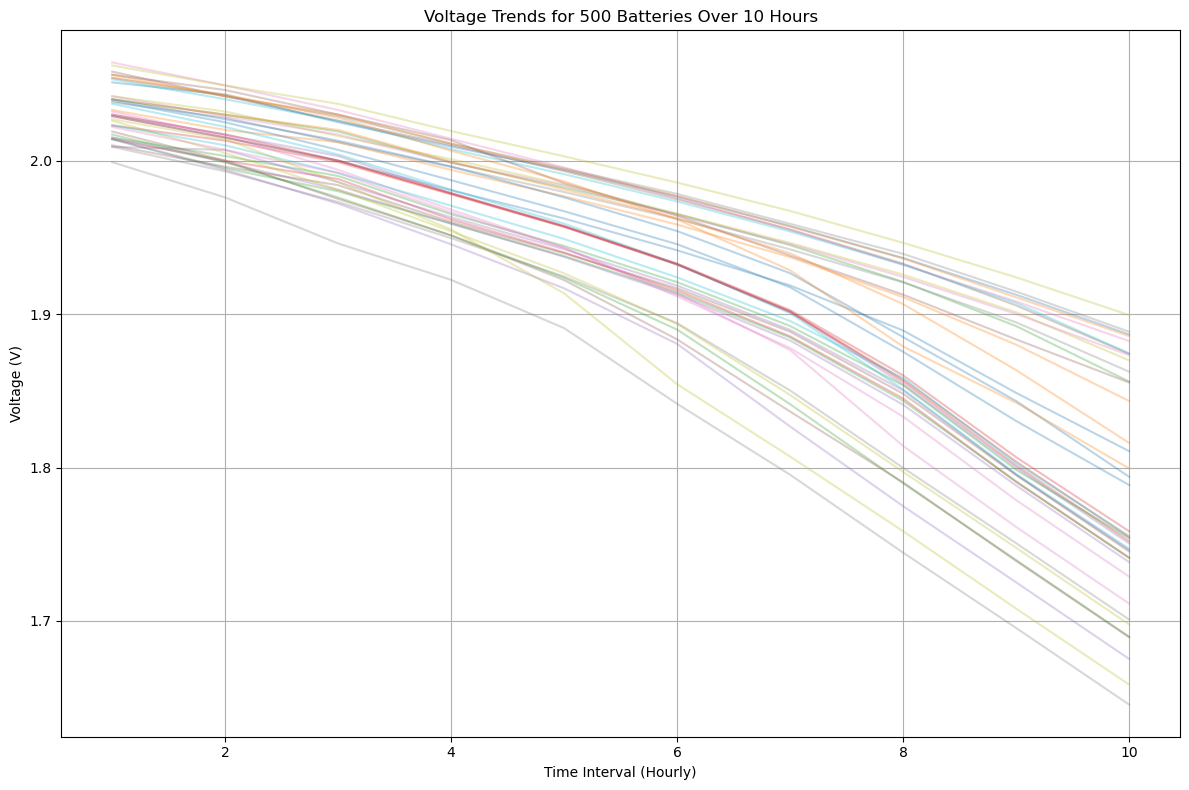

In [6]:

data_path = './predict_rf_test1.csv'

csv_data_plot(data_path)



In [43]:

# Delete data whose value at the next moment is higher than the value at the previous moment;

data_path = './transposed_battery_data_500_v3.csv'
data = pd.read_csv(data_path, header=None)

data = data.iloc[1:]
#remove the 1st column from the data
data = data.iloc[:, 1:]

index_l = []
pos = []
for index, row in data.iterrows():
# Check whether the next data is greater than the previous data
    row = list(row)
    # print(row.type)

    for i in range(1, len(row)):
        if row[i] > row[i-1]:
            # If the latter data is greater than the previous data, print the row number (row index plus 1)
            pos.append(i)
            index_l.append(index+1)
        else:
            continue

print(index_l) 
print(len(index_l))
print(pos)
print(len(pos))


[]
0
[]
0


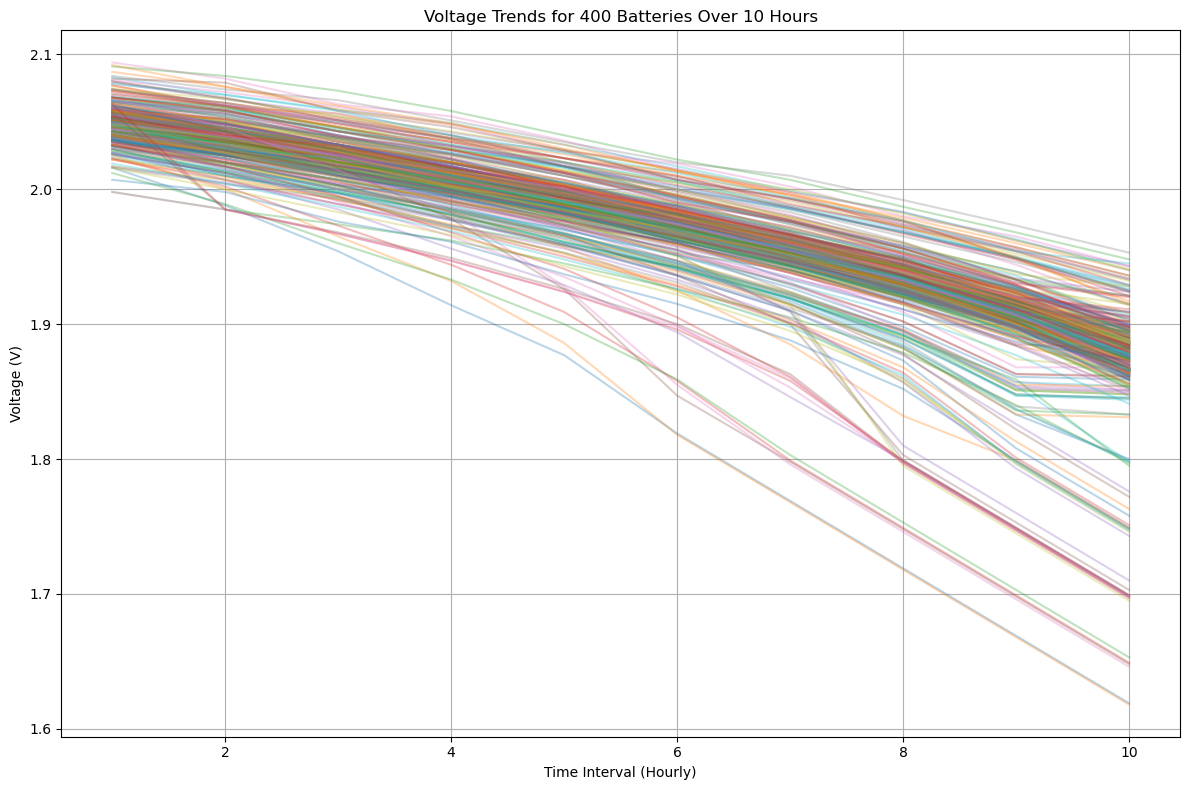

In [85]:


data_path = './adjusted_data.csv'

csv_data_plot_range(data_path,i=0,j=400)



In [84]:

# Regression interpolation processing, interpolation training data;

# Linear interpolation
import pandas as pd
import numpy as np
from scipy.interpolate import CubicSpline

#Load CSV file
data_path = './transposed_battery_data_500_v4.csv' # CSV file path
df = pd.read_csv(data_path)

# remove the 1st row from the data
data = df.iloc[1:]
#remove the 1st column from the data
data = data.iloc[:, 1:]

# Preprocessing step 1: When a certain row of data, when the current value is less than 1.8, such as 1.79, if the subsequent value is the same as the current value, give them -0.05 compared to the previous value in turn;

for index, row in data.iterrows():
    i = 0
    while i < len(row)-1:
        # print(row[i])
i += 1
        if abs(row[i]-1.8) < 0.03: # If the current value is less than 1.8
            # Check whether the following value is the same as the current value
            tmp = row[i]
            # print(index+1,tmp)
            while i < len(row)-1 :
                # If the same, subtract 0.05,
                row[i + 1] = row[i] -0.05
                i += 1
        
    # print(row)

# print(df)
    
data.to_csv('adjusted_data.csv', index=False)




# # Traverse each row and interpolate data below 1.8V
# for index, row in df.iterrows():
# row_copy = row.copy()
# # Mark data below 1.8V as NaN
# row_copy[row_copy < 1.799] = np.nan
# # Use linear interpolation to fill NaN values
# row_copy.interpolate(method='linear', inplace=True)
    
# # Write the interpolated data back to the original DataFrame
# df.iloc[index] = row_copy
    
    
# df.to_csv('interpolated_data.csv', index=False)

#Print the interpolated data
# print(df)

In [88]:
# test data; preprocessing


# Regression interpolation processing, interpolation training data;

# Linear interpolation
import pandas as pd
import numpy as np
from scipy.interpolate import CubicSpline

#Load CSV file
data_path = './predict_raw.csv' # CSV file path
df = pd.read_csv(data_path)

# remove the 1st row from the data
data = df.iloc[1:]
#remove the 1st column from the data
data = data.iloc[:, :]

# Preprocessing step 1: When a certain row of data, when the current value is less than 1.8, such as 1.79, if the subsequent value is the same as the current value, give them -0.05 compared to the previous value in turn;

for index, row in data.iterrows():
    i = 0
    while i < len(row)-1:
        # print(row[i])
        i += 1
if abs(row[i]-1.8) < 0.03: # If the current value is less than 1.8
            # Check whether the following value is the same as the current value
            tmp = row[i]
            # print(index+1,tmp)
            while i < len(row)-1 :
                # If the same, subtract 0.05,
                row[i + 1] = row[i] -0.05
                i += 1
        
# print(df)
data.to_csv('predict_raw_adjusted_data.csv', index=False)

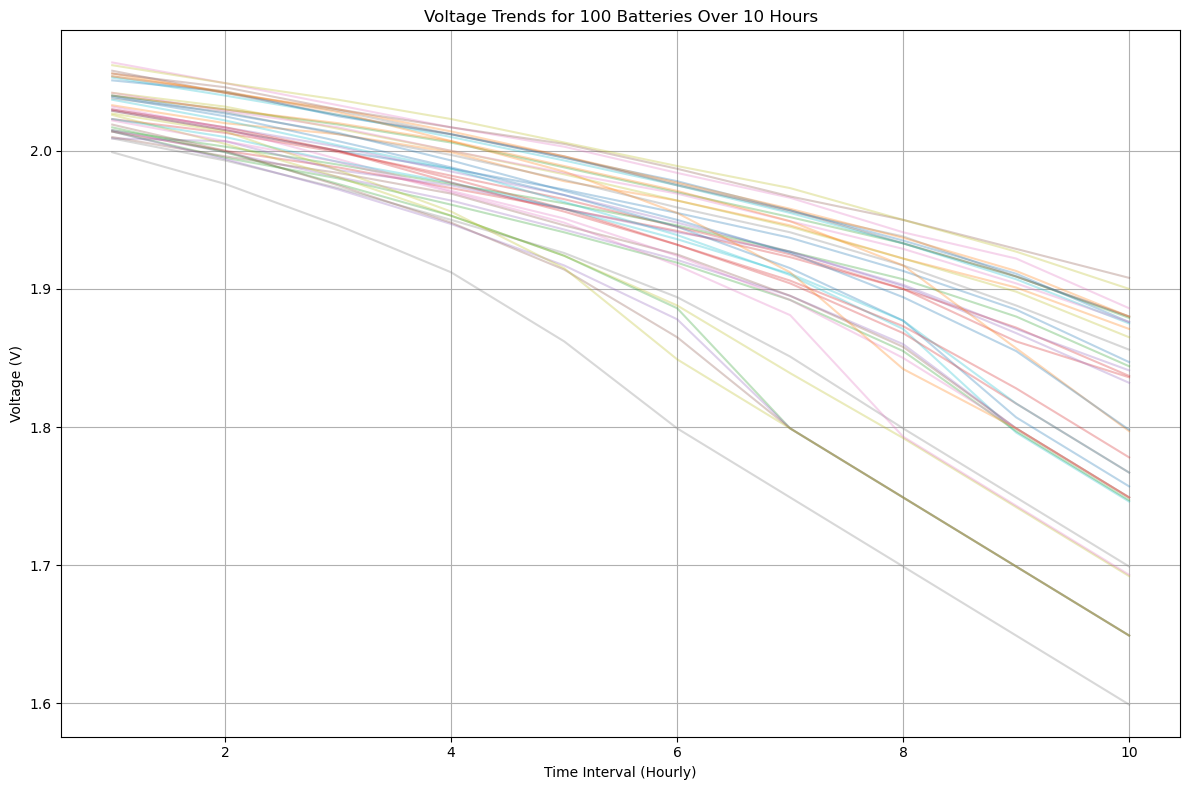

In [7]:

data_path = './predict_raw_adjusted_data.csv'
csv_data_plot_range(data_path,i=0,j=100)

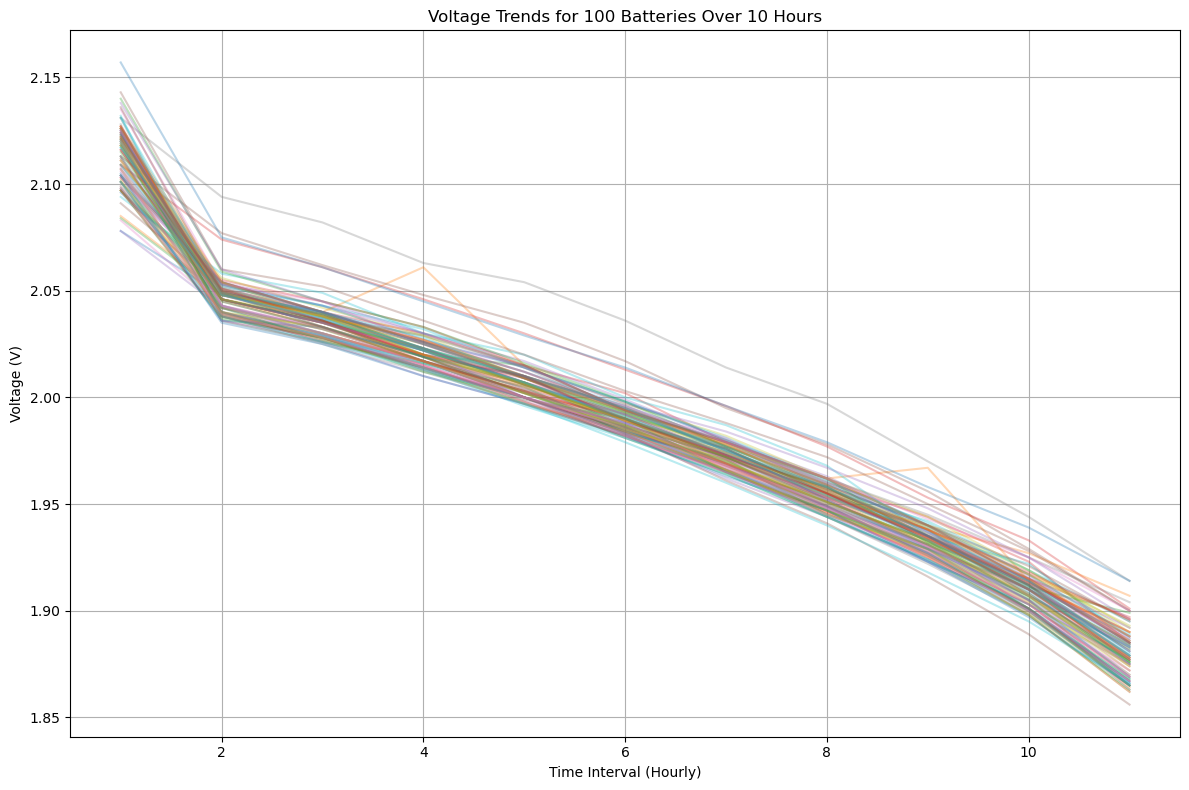

In [14]:

data_path = './transposed_battery_data_500_v2.csv'
csv_data_plot_range(data_path,i=0,j=100)


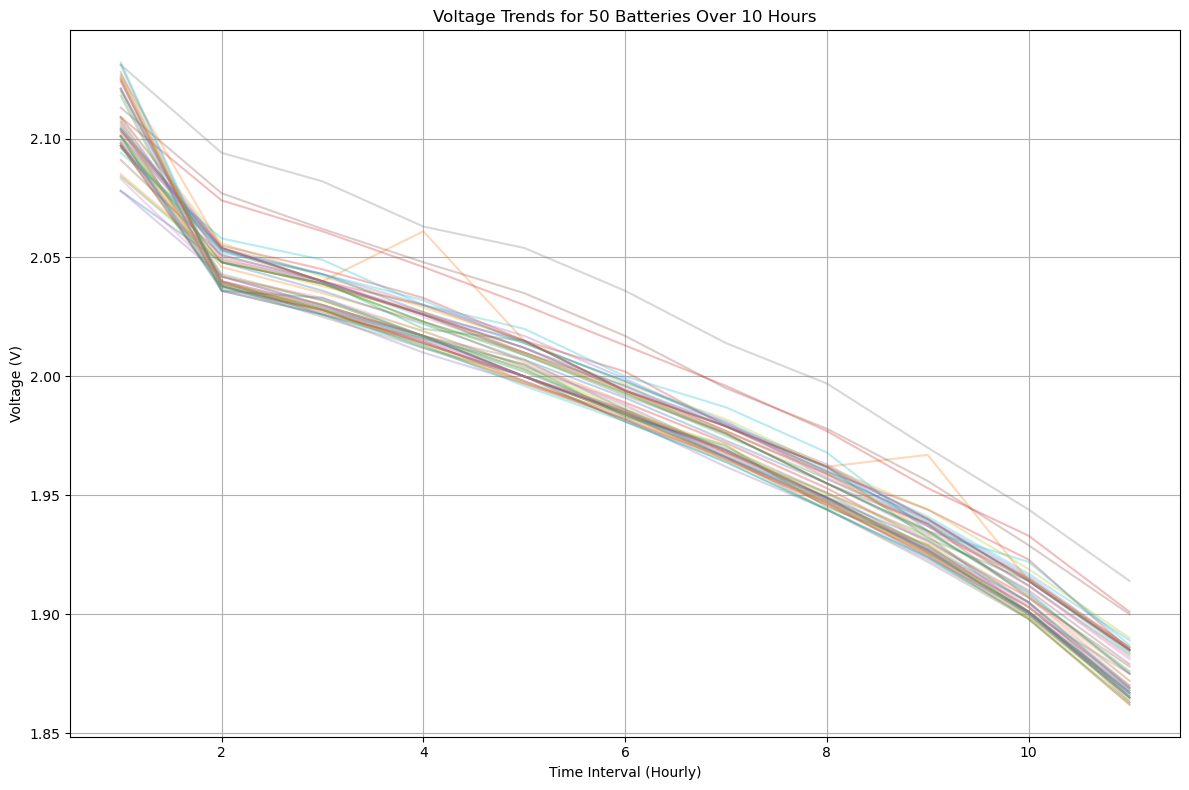

In [18]:

data_path = './transposed_battery_data_500_v2.csv'
csv_data_plot_range(data_path,i=0,j=50)

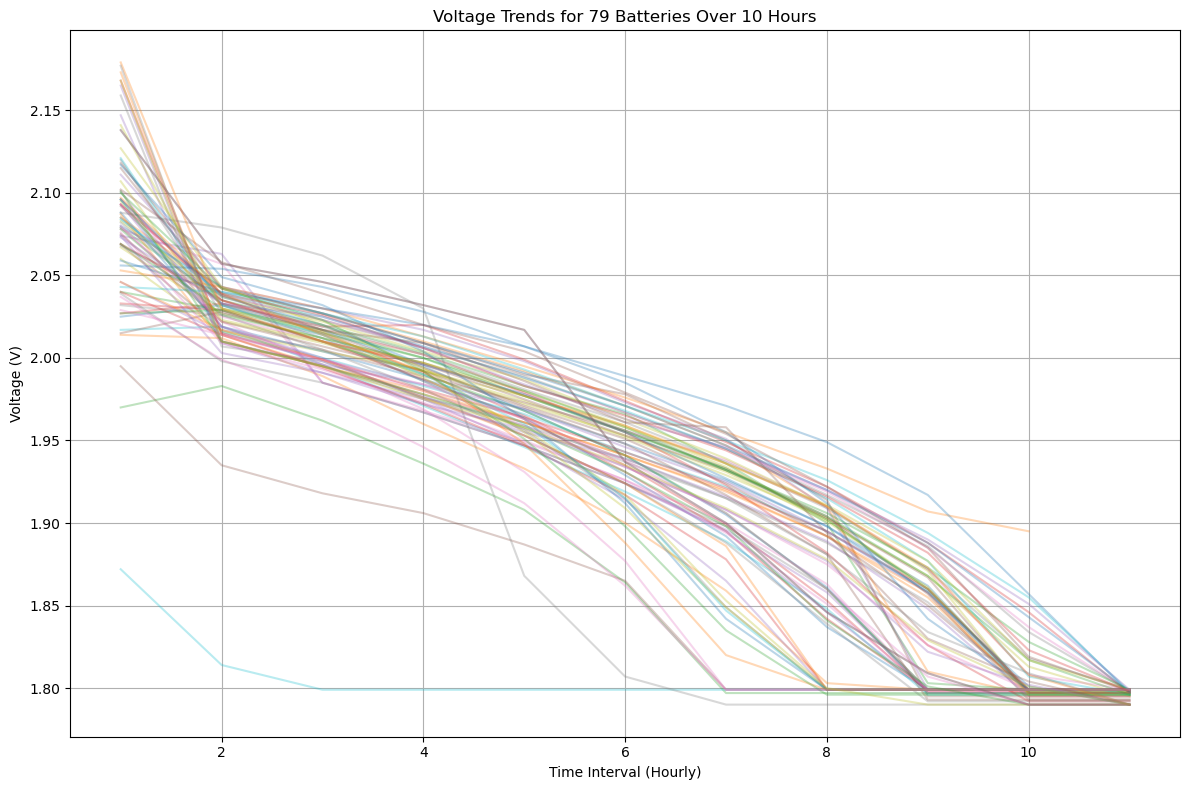

In [20]:

data_path = './transposed_battery_data_500_v2.csv'
csv_data_plot_range(data_path,i=401,j=480)

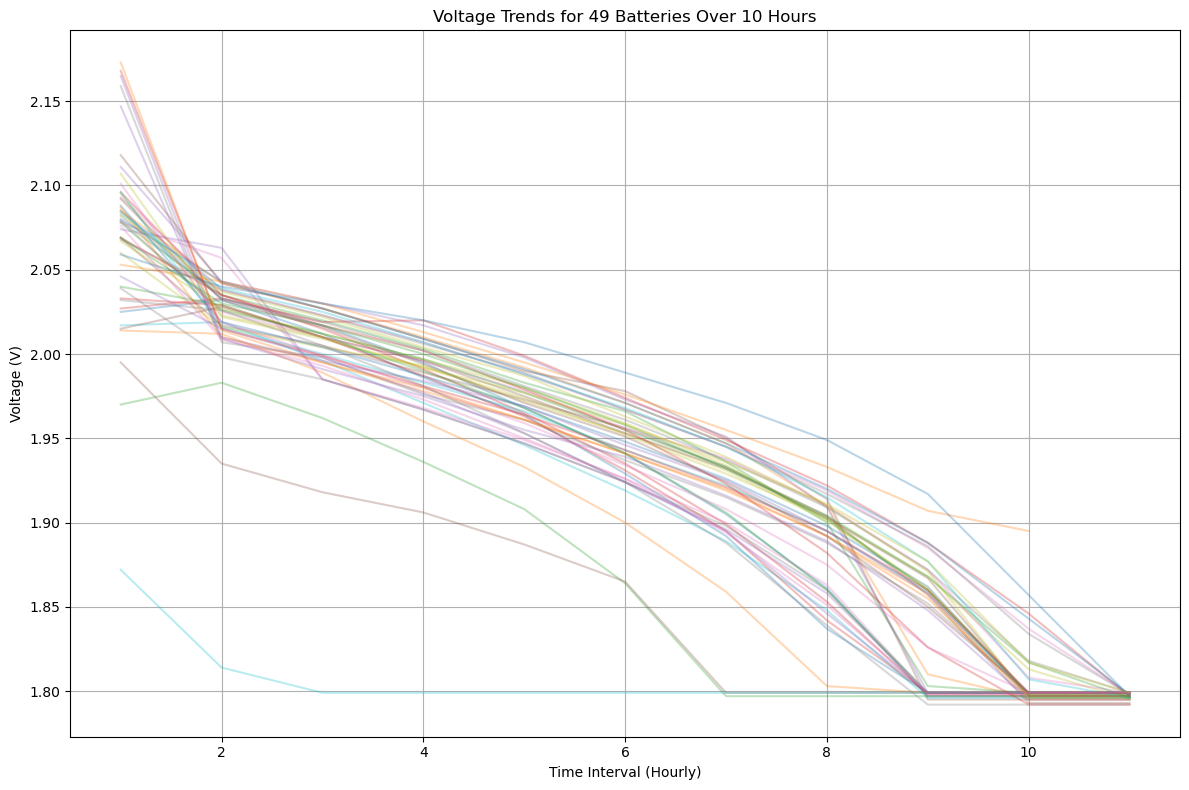

In [21]:

data_path = './transposed_battery_data_500_v2.csv'
csv_data_plot_range(data_path,i=401,j=450)

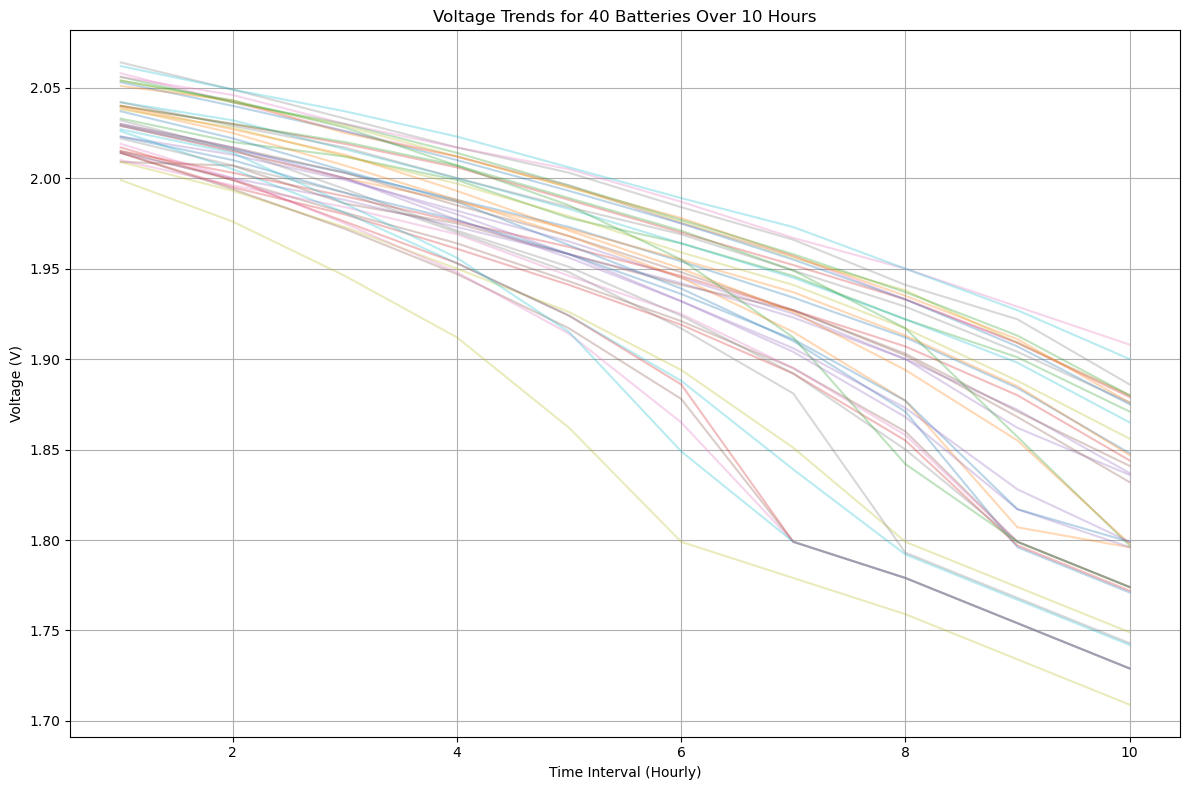

In [23]:

data_path = './predict_raw.csv'
csv_data_plot_range(data_path,i=0,j=40)

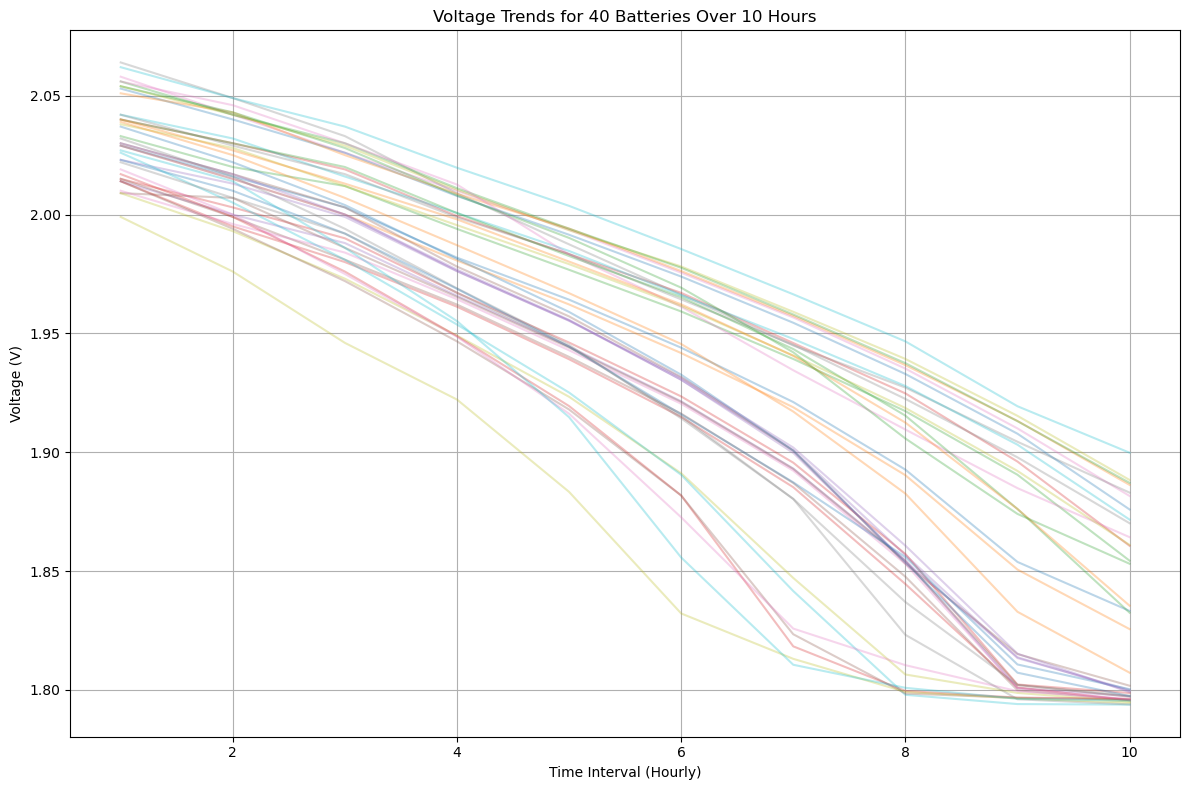

In [24]:

data_path = './predict.csv'
csv_data_plot_range(data_path,i=0,j=40)